In [1]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# Load simulated test data. 

filename = 'df_simulated'

df_test = pd.read_csv(filename+'.csv')

## Predict tau-PET load

In [3]:
# load imputer, pipeline and variable names

# select the appropriate model
imputer = joblib.load('tau_load/model7/clin_plasma_mri_trained_imputer.pkl')
pipeline = joblib.load('tau_load/model7/clin_plasma_mri_trained_regressor.pkl')
variables = joblib.load('tau_load/model7/clin_plasma_mri_input_variables.pkl')


In [4]:
# First outcome, if available (not needed for prediction)
outcome1 = 'tnic_cho_com_I_IV' # outcome variable name, change as suitable
y_true = df_test[outcome1]

In [5]:
# Impute data for missing columns

X_test = imputer.transform(df_test[variables])
X_test = pd.DataFrame(X_test,columns=variables)

In [6]:
# Predict tau load using the pre-trained pipeline

y_pred = pipeline.predict(X_test)

# save prediction as column
df_test['pred_'+outcome1] = y_pred

In [7]:
# if y_true available
# Calculate and print summary metrics
mae = mean_absolute_error(y_true,y_pred)
r2 = np.corrcoef(y_true,y_pred)[0,1]*np.corrcoef(y_true,y_pred)[0,1]

print('Mean absolute error: {:.3f}'.format(mae))
print('R2 score: {:.3f}'.format(r2))

Mean absolute error: 0.441
R2 score: 0.006


Text(0, 0.5, 'Predicted')

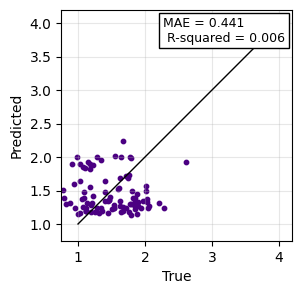

In [8]:
# if y_true available
# Plot scatter plot of predicted versus true and print 

plt.rcParams["figure.figsize"] = (5,3)
fig, axs = plt.subplots(1,1)
x_line = np.linspace(1,4,2)
y_line = np.linspace(1,4,2)
plt.rc('font', size=10)
plt.scatter(y_true,y_pred,c = 'indigo',s=10)
axs.set_aspect('equal', adjustable='box')
plt.grid(alpha=0.3)
props = dict(boxstyle='square', facecolor='white')
axs.plot(x_line,y_line,c='black',linewidth=1)
axs.text(0.44, 0.97, 'MAE = {:.3f} \n R-squared = {:.3f}'.format(mae,r2), transform=axs.transAxes,verticalalignment='top', bbox=props,size=9)
axs.set_ylim([0.75, 4.2])
axs.set_xlim([0.75,4.2])
axs.set_yticks([1,1.5,2,2.5, 3, 3.5, 4,])
plt.xlabel('True')
plt.ylabel('Predicted')
#plt.savefig('y_scatter_load_linear_bf1.png',bbox_inches='tight',dpi=300)


## Predict laterality index in tau-positive individuals

In [9]:
# filter out tau-positive individuals based on previous prediction (or use other method)
df_pos = df_test[df_test['pred_'+outcome1] > 1.34]

In [10]:
# load imputer, pipeline and variable names

# select the appropriate model
imputer = joblib.load('tau_asymmetry/model1/mri_trained_imputer.pkl')
pipeline = joblib.load('tau_asymmetry/model1/mri_trained_regressor.pkl')
variables = joblib.load('tau_asymmetry/model1/mri_input_variables.pkl')


In [11]:
# Second outcome, if available (not needed for prediction)
outcome2 = 'avg_lat_idx' # outcome variable name, change as suitable
y_true = df_pos[outcome2]

In [12]:
# Impute data for missing columns

X_test = imputer.transform(df_pos[variables])
X_test = pd.DataFrame(X_test,columns=variables)

In [13]:
# Predict tau asymmetry using the pre-trained pipeline

y_pred = pipeline.predict(X_test)

In [14]:
# if y_true available
# Calculate and print summary metrics
mae = mean_absolute_error(y_true,y_pred)
r2 = np.corrcoef(y_true,y_pred)[0,1]*np.corrcoef(y_true,y_pred)[0,1]

print('Mean absolute error: {:.3f}'.format(mae))
print('R2 score: {:.3f}'.format(r2))

Mean absolute error: 7.692
R2 score: 0.011


Text(0, 0.5, 'Predicted')

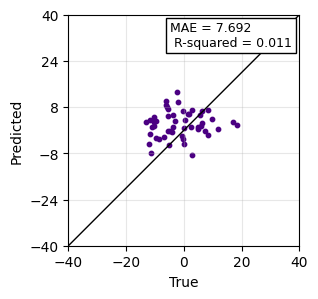

In [15]:
# if y_true available
# Plot scatter plot of predicted versus true and print 

plt.rcParams["figure.figsize"] = (5,3)
fig, axs = plt.subplots(1,1)
x_line = np.linspace(-40,40,2)
y_line = np.linspace(-40,40,2)
plt.rc('font', size=10)
plt.scatter(y_true,y_pred,c = 'indigo',s=10)
axs.set_aspect('equal', adjustable='box')
plt.grid(alpha=0.3)
props = dict(boxstyle='square', facecolor='white')
axs.plot(x_line,y_line,c='black',linewidth=1)
axs.text(0.44, 0.97, 'MAE = {:.3f} \n R-squared = {:.3f}'.format(mae,r2), transform=axs.transAxes,verticalalignment='top', bbox=props,size=9)
axs.set_ylim([-40, 40])
axs.set_xlim([-40,40])
axs.set_yticks([-40,-24,-8,8,24, 40])
plt.xlabel('True')
plt.ylabel('Predicted')
#plt.savefig('y_scatter_load_linear_bf1.png',bbox_inches='tight',dpi=300)


In [16]:
df_test.loc[df_pos.index,'pred_avg_lat_idx'] = y_pred

## Save predictions in updated csv file

In [17]:
# save predictions

df_test.to_csv(filename + '_with_pred.csv',index=False)